X Education Lead Scoring Case Study
Introduction
X Education, an online education company, aims to enhance its lead conversion process by identifying potential leads more efficiently. Currently facing a low lead conversion rate, the company is seeking a data-driven solution to assign lead scores to each prospect. The goal is to prioritize and focus on leads with higher conversion potential, ultimately increasing the overall lead conversion rate to around 80%.

Data Overview
The dataset provided contains approximately 9000 data points, including various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable, 'Converted,' indicates whether a lead was converted (1) or not (0). Additionally, it is crucial to address categorical variables with a level called 'Select,' treating it as a null value.

Objectives
Data Preprocessing:

Handle 'Select' levels in categorical variables.
Explore and clean the dataset for missing values, outliers, and other inconsistencies.
Building a Logistic Regression Model:

Implement a logistic regression model to predict the probability of leads getting converted.
Utilize relevant features to generate lead scores between 0 and 100 for each lead.
Model Evaluation and Refinement:

Assess the model's performance using appropriate metrics.
Fine-tune the model to optimize lead score predictions.

```

```



1. IMPORT NECESSARY LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. EXPLORING DATAFRAME

In [3]:
lead = pd.read_csv('Leads.csv')

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

EXPLORATORY DATA ANALYSIS

In [8]:
#missing value count
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
all_col = lead.columns
all_col

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
#dropping the columns with missing value percentage more than 35%
for i in all_col:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 35):
        lead.drop(i, 1, inplace = True)

In [11]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
lead.drop(['City'], axis = 1, inplace = True)

In [13]:
lead.drop(['Country'], axis = 1, inplace = True)

In [14]:

round(100*(lead.isnull().sum()/len(lead.index)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [16]:
categorical_columns = lead.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
for column in categorical_columns:
    imbalance_percentage = lead[column].value_counts()
    print(f"\n{column} Imbalance:")
    print(imbalance_percentage)


Prospect ID Imbalance:
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

Lead Origin Imbalance:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source Imbalance:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                

In [18]:
#dropping the null value rows of these columns. at times the lead may not have selected any option thus it shows 'select' as it is.
lead = lead[~pd.isnull(lead['TotalVisits'])]
lead = lead[~pd.isnull(lead['Lead Source'])]
lead = lead[~pd.isnull(lead['Specialization'])]



In [19]:
# 'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.
lead.drop(['What matters most to you in choosing a course'],axis=1, inplace = True)




In [20]:
# Also, deleting these columns as their value is 'no'
lead.drop(['Lead Profile', 'How did you hear about X Education','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)


In [21]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [22]:
#droping the null value rows of this column
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [23]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [24]:
#null values in categorical columns
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [25]:
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [26]:
lead.shape

(6373, 12)

In [27]:
lead.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [28]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
cat_col = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [30]:
num_col = ['TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' ]

In [31]:
target_col = ['Converted']

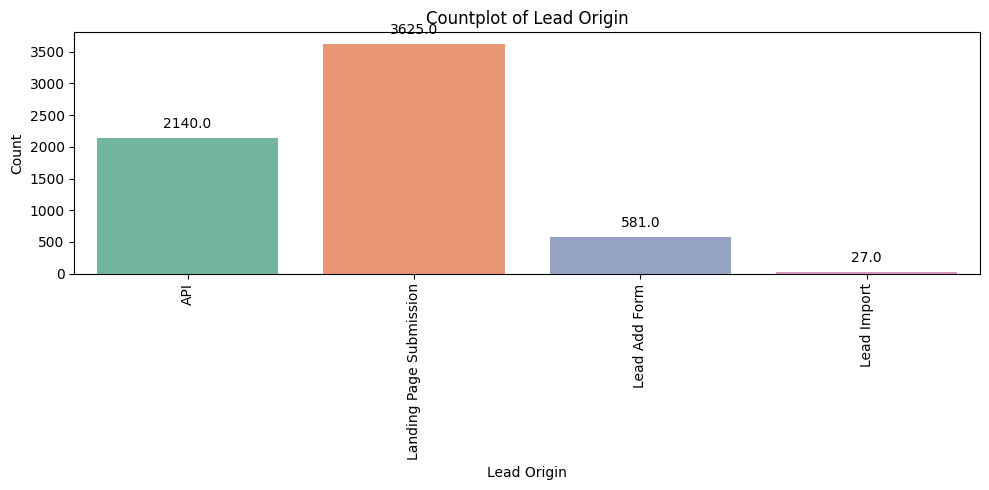

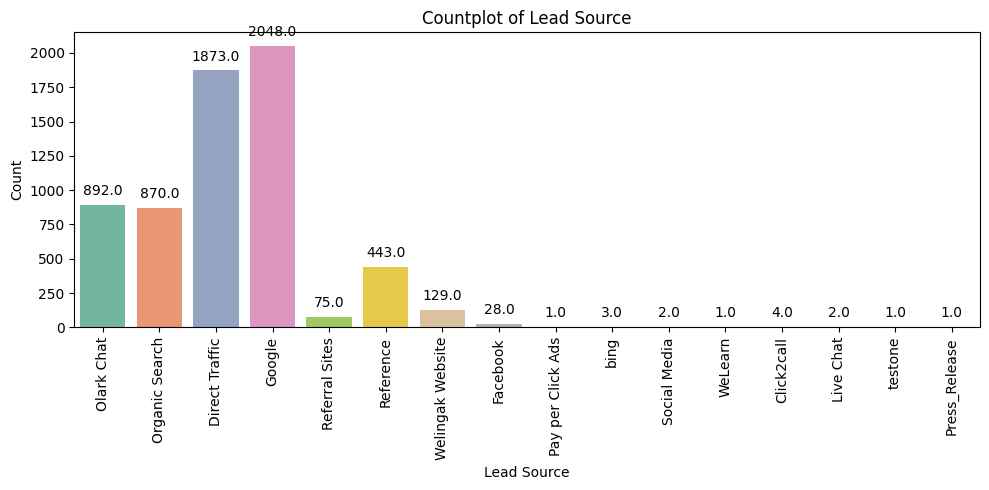

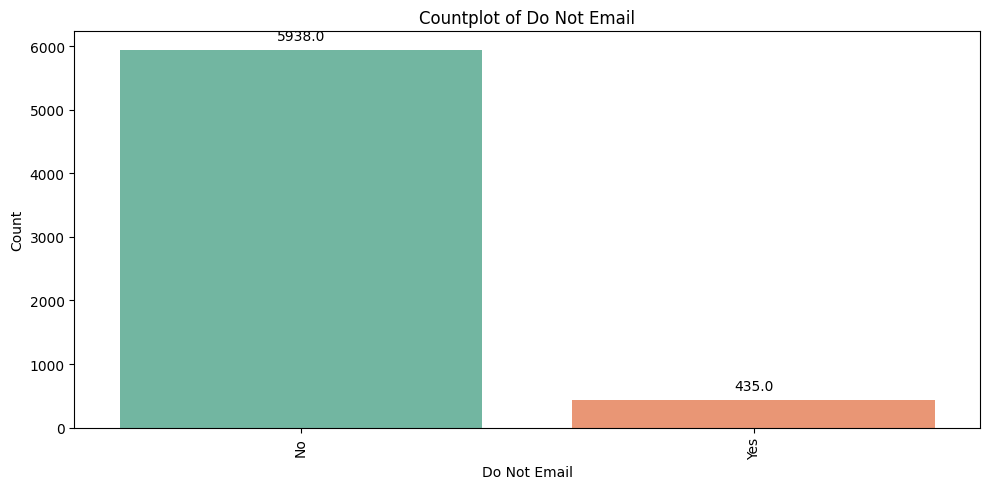

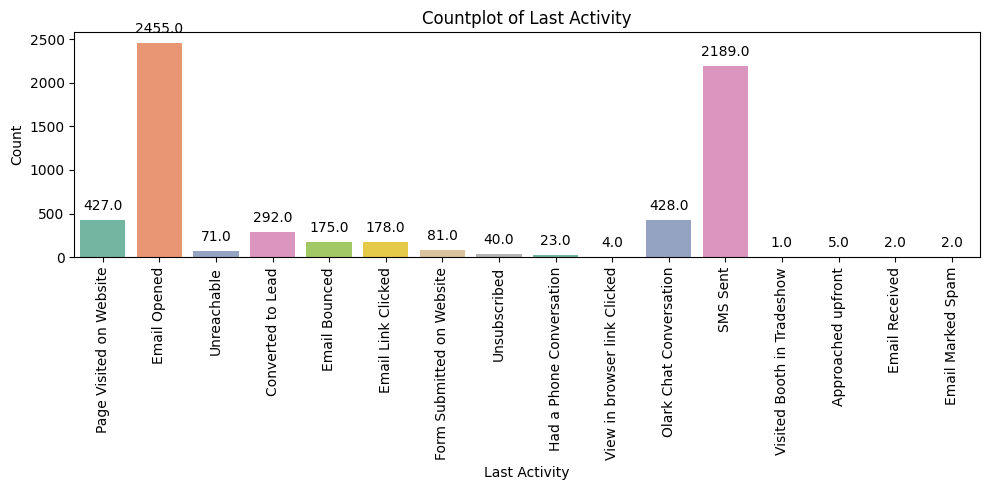

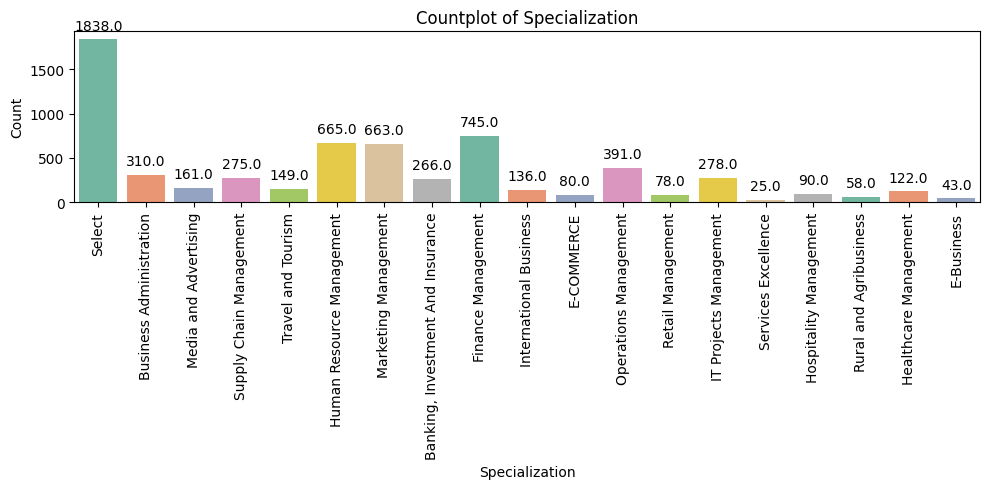

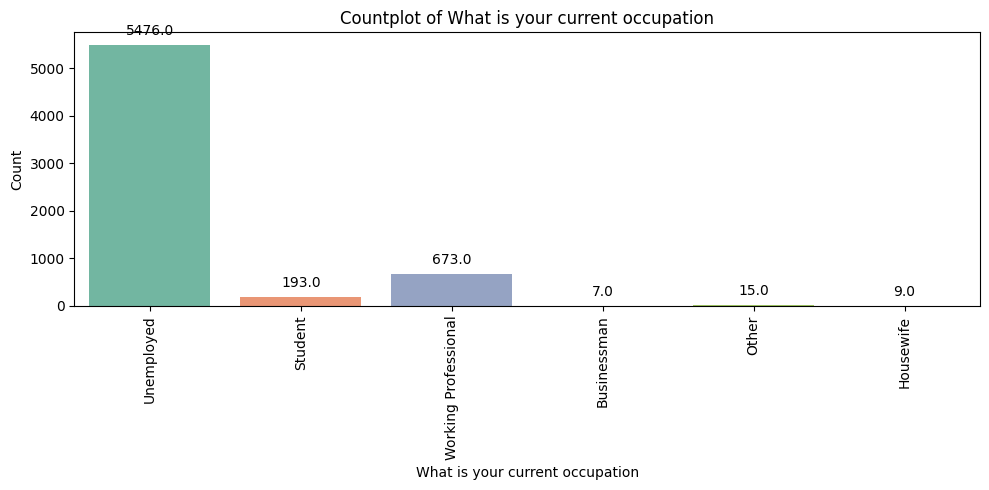

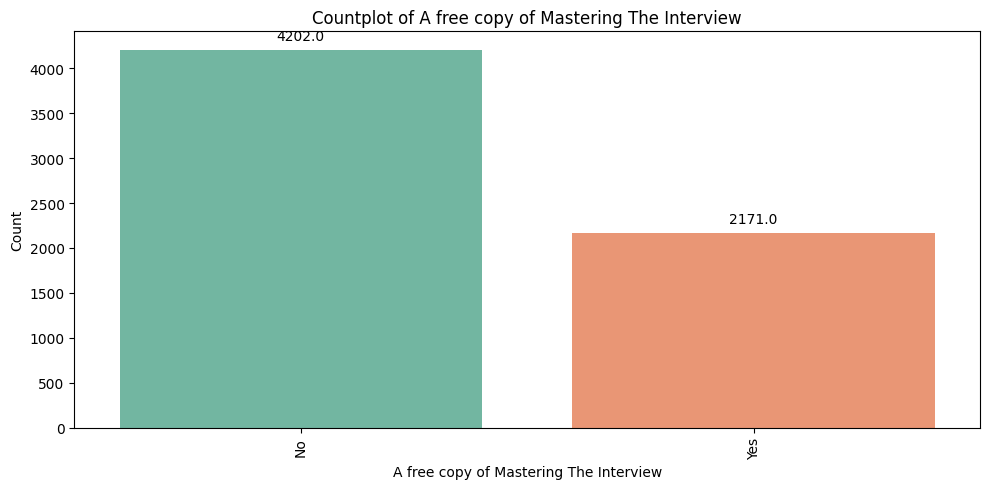

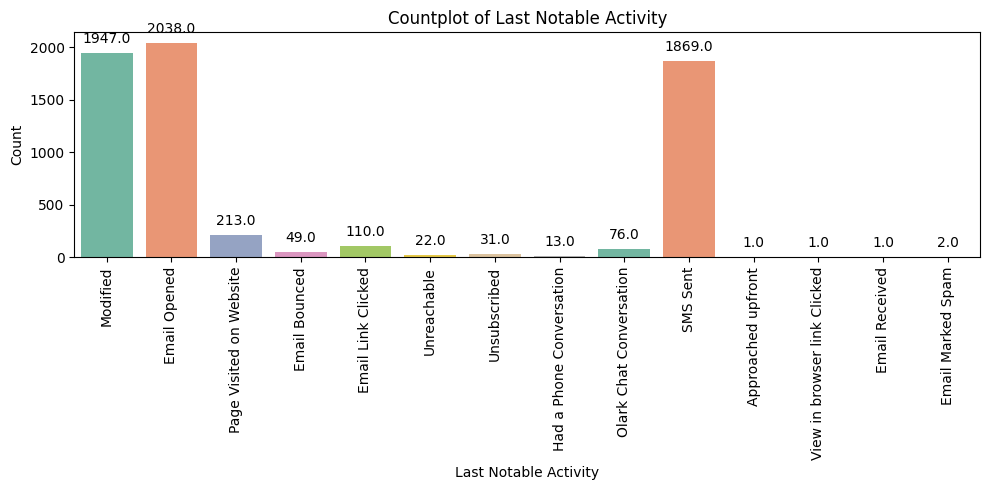

In [32]:
#univariate analysis
for col in cat_col:
    # Create a figure and an axis object with a larger figsize
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot a countplot with the category names as x-axis and the counts as y-axis using "Set2" palette
    sns.countplot(data=lead, x=col, ax=ax, palette="Set2")

    # Add a title and labels
    ax.set_title(f"Countplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Auto adjust the size of the plot according to the x-axis labels
    fig.tight_layout()

    # Show the plot
    plt.show()




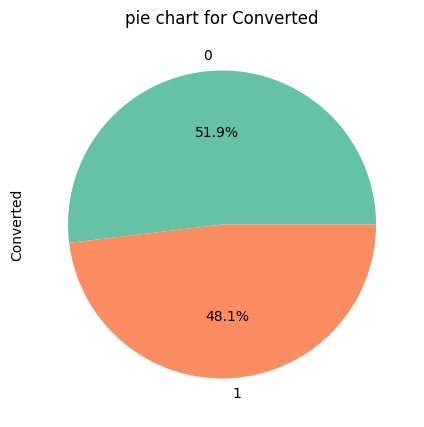

In [33]:
#pie-chart for target column - converted
#make pie chart for Converted
plt.figure(figsize=(5, 5))

# Use the "Set2" palette for the pie chart
lead['Converted'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))

plt.title('pie chart for Converted', color='Black')
plt.show()


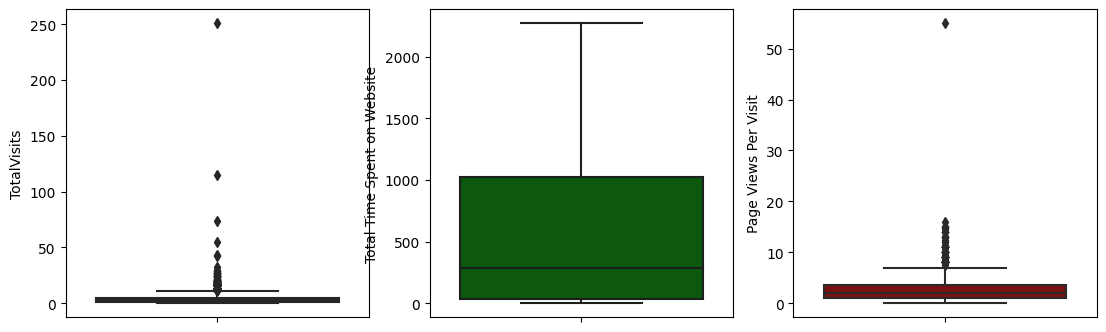

In [34]:
plt.figure(figsize=(18, 4))

i = 1
box_plot_colors = ['navy', 'darkgreen', 'darkred', 'darkorange']

for c, color in zip(num_col, box_plot_colors):
    plt.subplot(1, 4, i)
    sns.boxplot(y=c, data=lead, color=color)
    i += 1

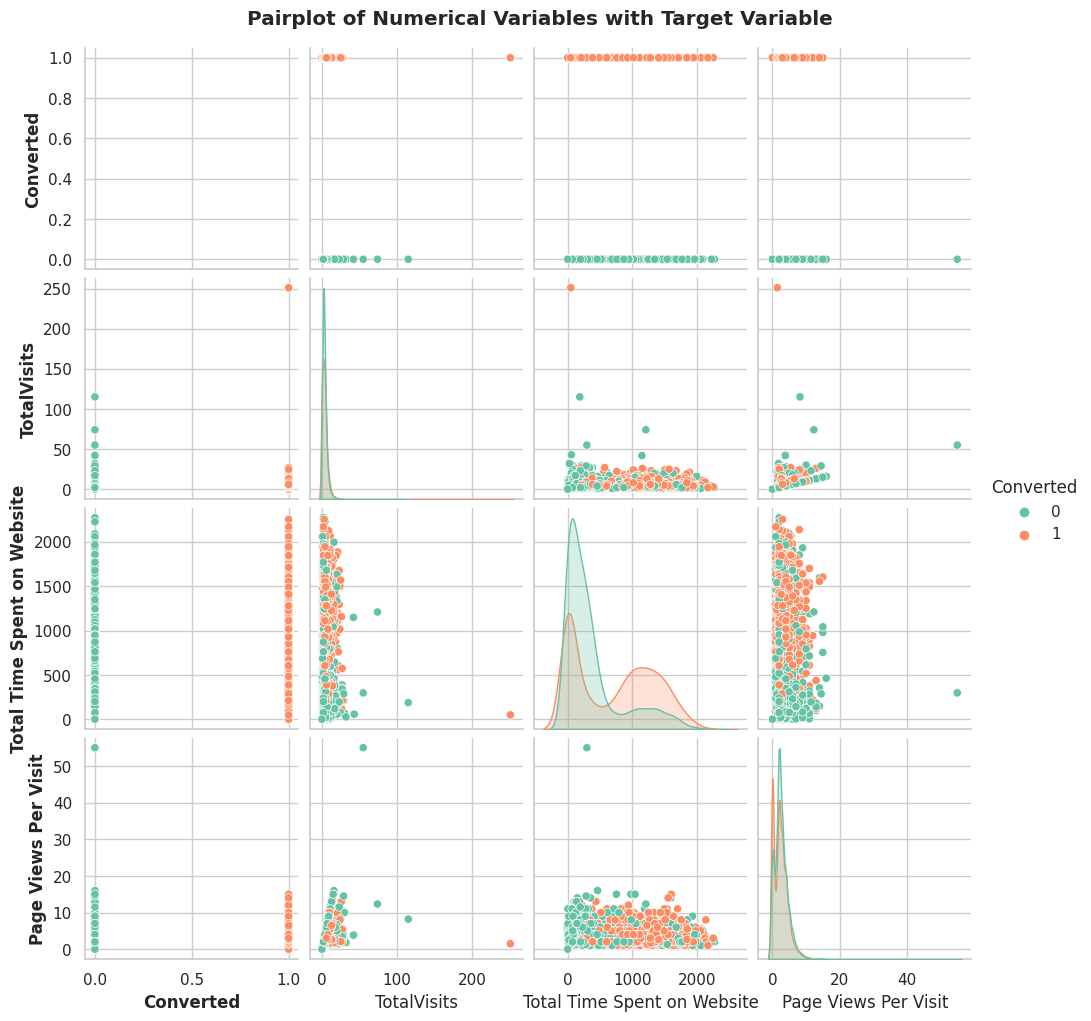

In [35]:
#bivariate analysis
#plt.figure(figsize = (15,30))
#sns.pairplot(data=lead,vars=['Converted', 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' ])
#plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Specify the columns for the pairplot
pairplot_cols = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create the pairplot
pairplot = sns.pairplot(data=lead, vars=pairplot_cols, hue='Converted', palette='Set2')

# Add annotations to scatter plots
for i, ax in enumerate(pairplot.axes.flat):
    if i % len(pairplot_cols) == 0:  # Only for the diagonal subplots
        ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
        ax.set_ylabel(ax.get_ylabel(), fontweight='bold')
    else:
        for patch in ax.patches:
            ax.annotate(f'Corr: {patch.get_gid()}',
                        (patch.get_x() + patch.get_width() / 2., patch.get_y() + patch.get_height()),
                        ha='center', va='center', fontsize=8, fontweight='bold', color='blue')

# Adjust layout for better appearance
pairplot.fig.suptitle('Pairplot of Numerical Variables with Target Variable', y=1.02, fontweight='bold')

plt.show()



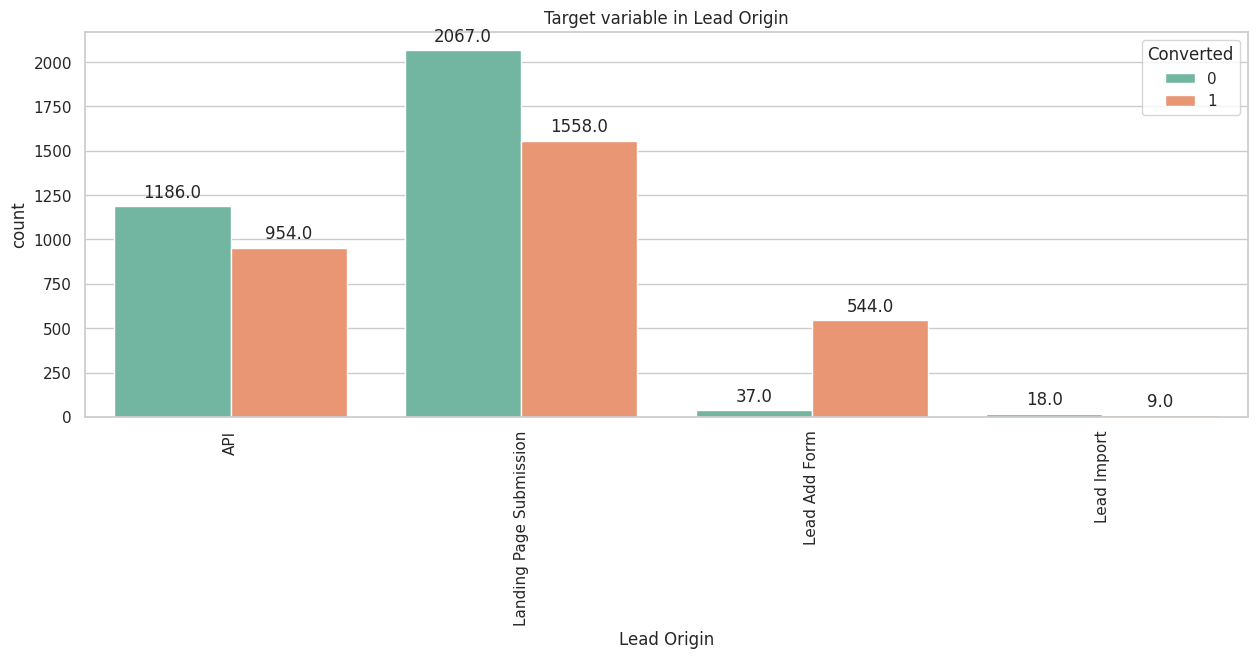

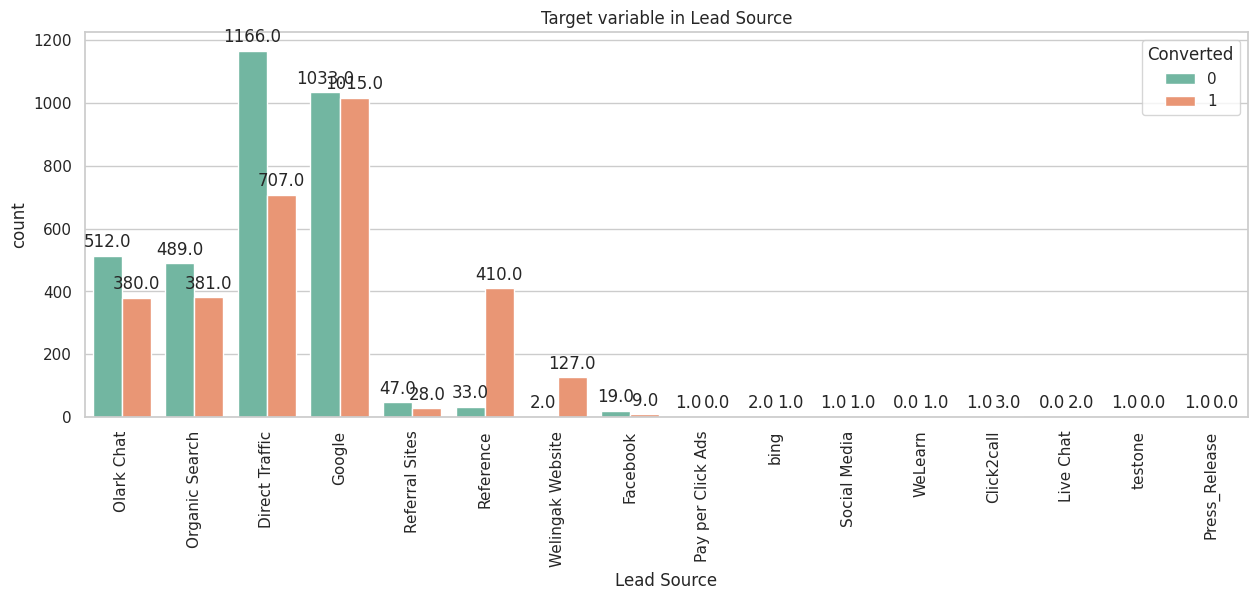

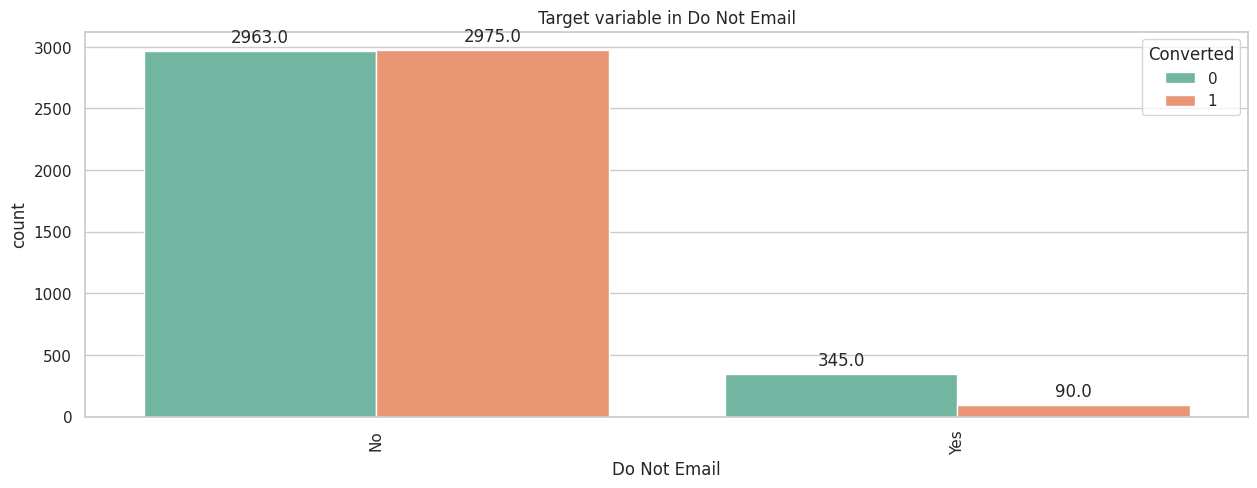

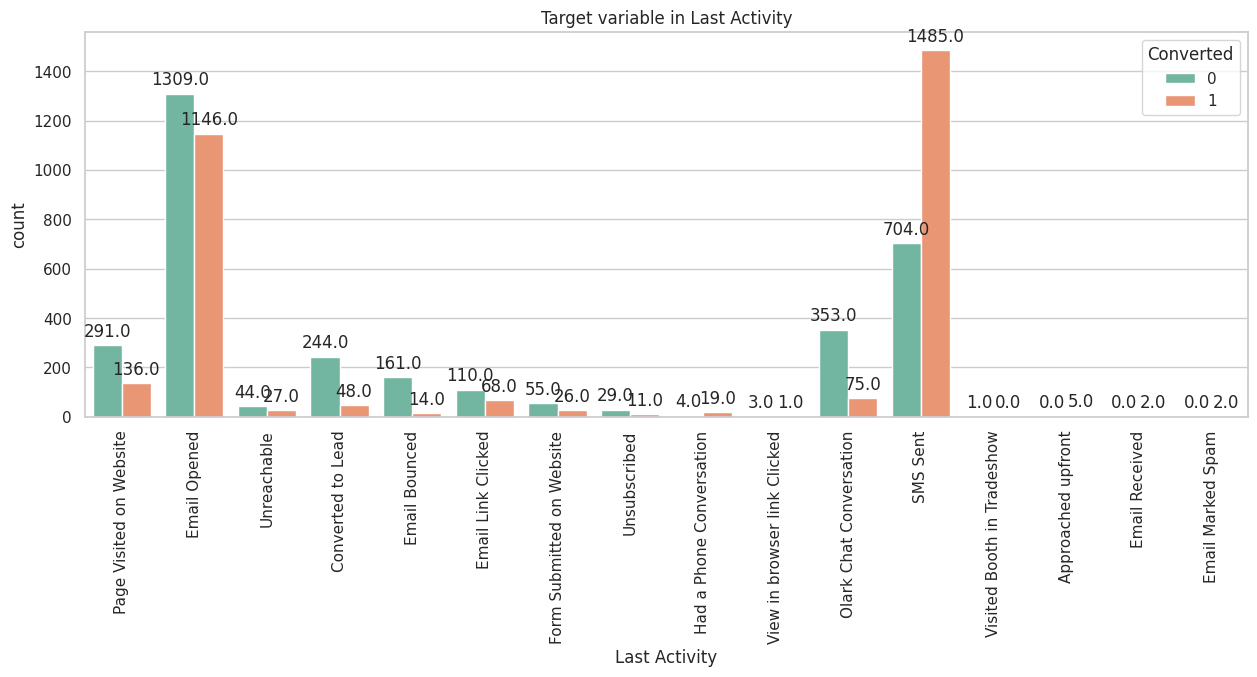

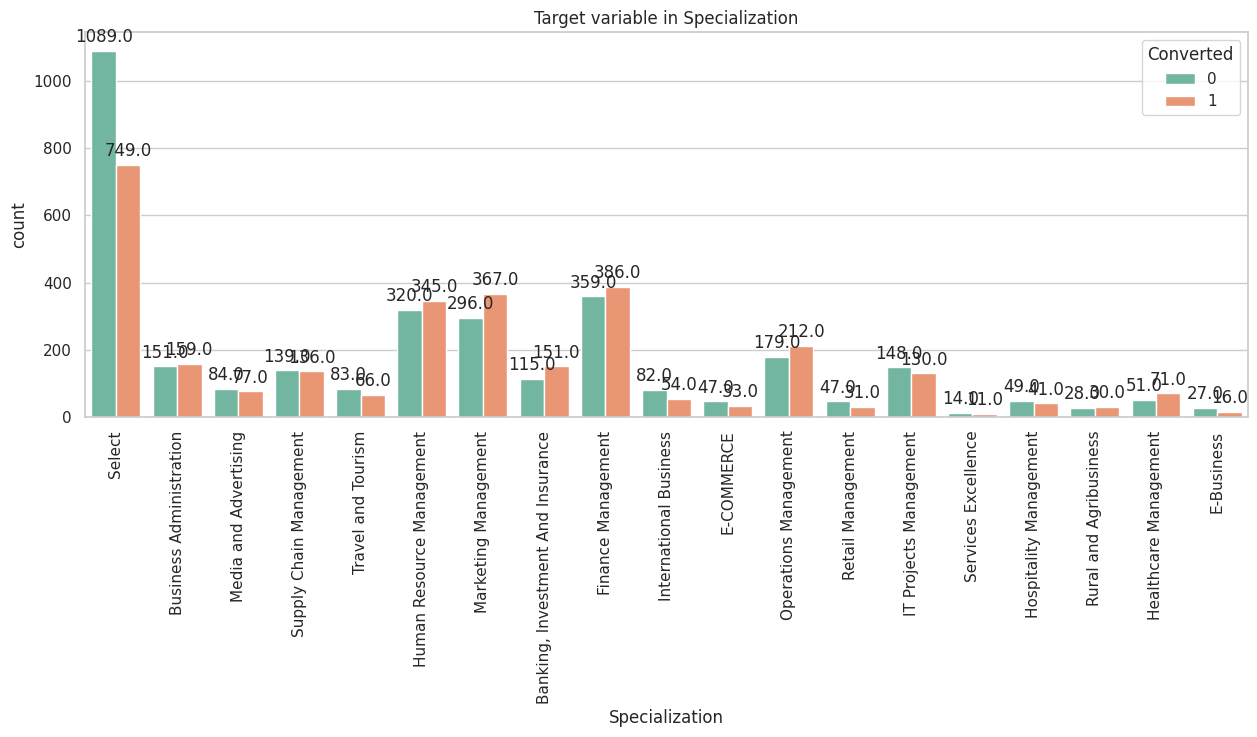

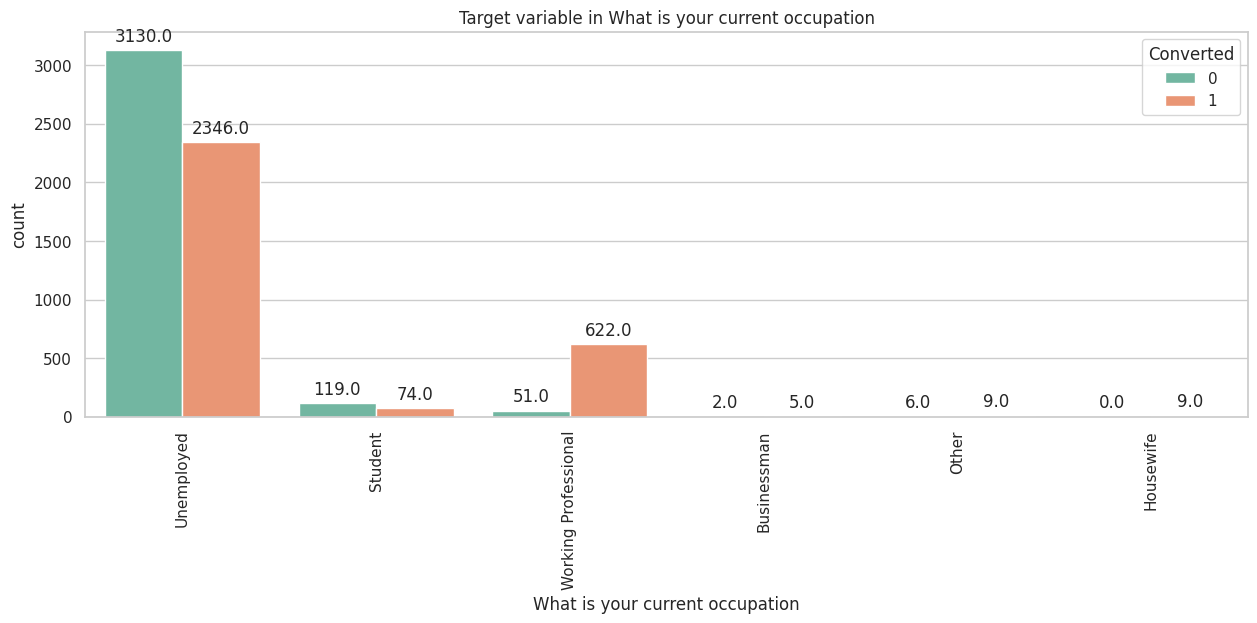

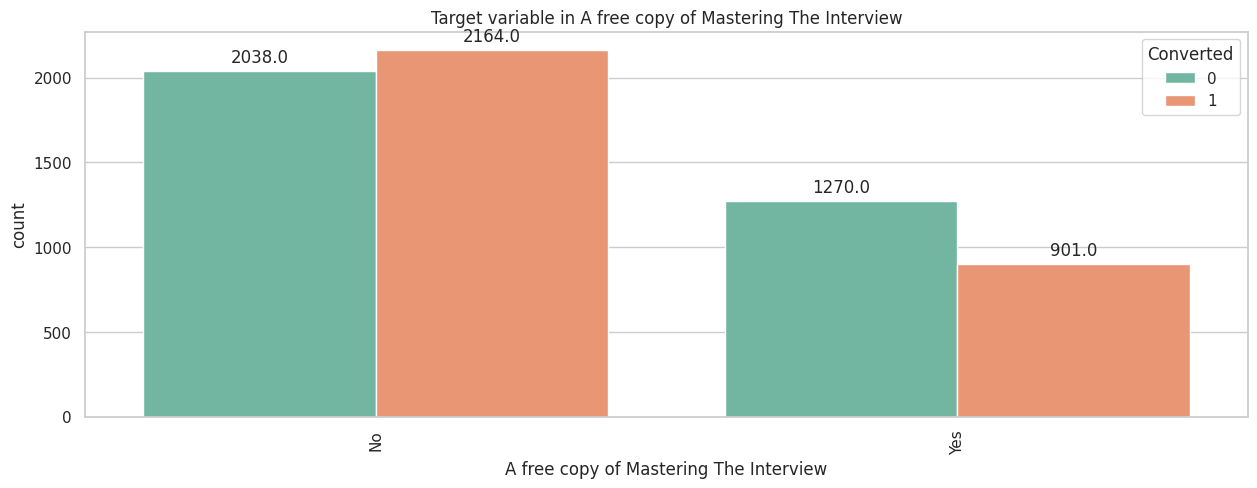

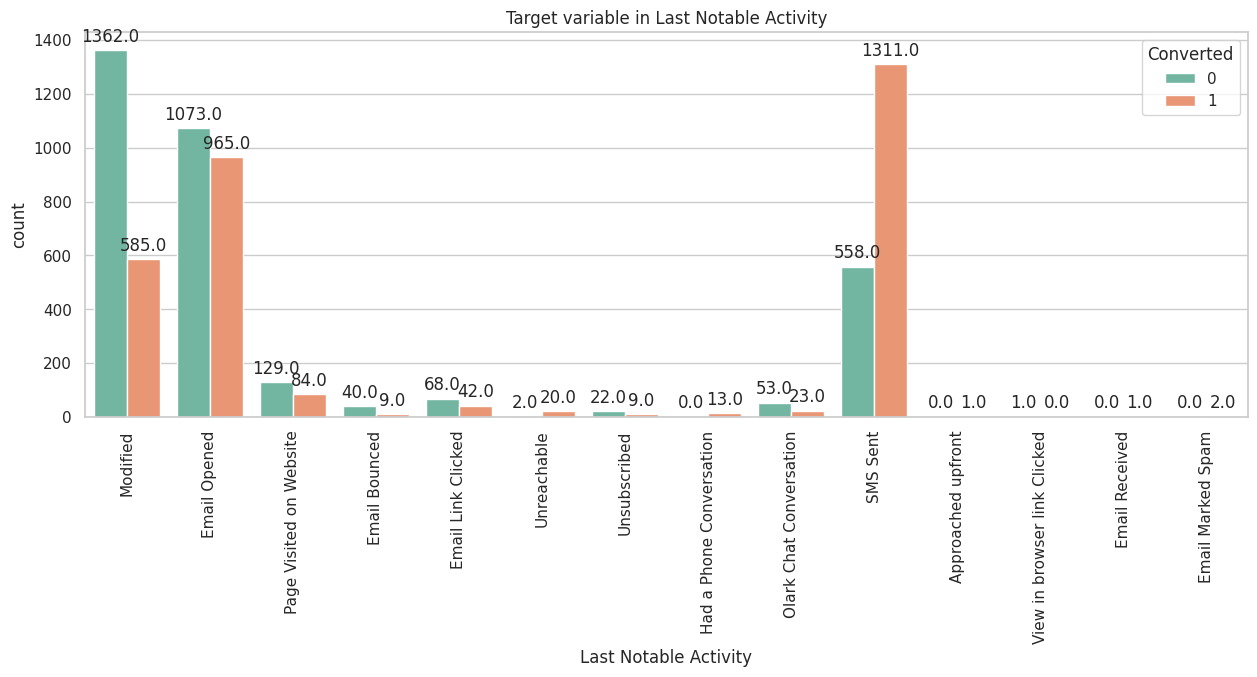

In [36]:
conv = lead.select_dtypes(include="object").columns

for i in conv:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=i, hue="Converted", data=lead, palette="Set2")  # Change "Set2" to your desired color palette
    plt.xticks(rotation=90)
    plt.title('Target variable in' + ' ' + i)
    plt.xlabel(i)

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()


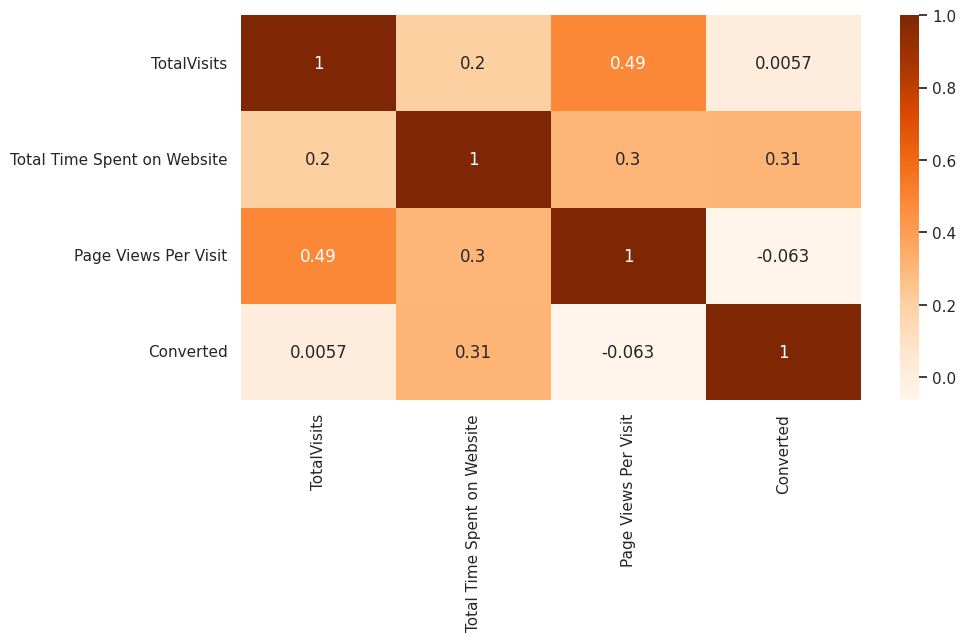

In [37]:
#multivariate analysis of numerical column with target variable\

plt.figure(figsize=(10, 5))

# Use the custom color palette for the heatmap
sns.heatmap(lead[num_col + ['Converted']].corr(), annot=True, cmap='Oranges')

plt.show()


In [38]:
#cheching categorical columns with non binary unique values
lead[cat_col].nunique()

Lead Origin                                4
Lead Source                               16
Do Not Email                               2
Last Activity                             16
Specialization                            19
What is your current occupation            6
A free copy of Mastering The Interview     2
Last Notable Activity                     14
dtype: int64

In [39]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [40]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
lead = pd.concat([lead, dummy_spl], axis = 1)

In [41]:
# Drop the variables for which the dummy variables have been created

lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [42]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# check null_values in the above dataframe
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Lead Origin_Landing Page Submission       0.0
                                         ... 
Specialization_Retail Management          0.0
Specialization_Rural and Agribusiness     0.0
Specialization_Services Excellence        0.0
Specialization_Supply Chain Management    0.0
Specialization_Travel and Tourism         0.0
Length: 75, dtype: float64

In [44]:
#TRAIN - TEST SPLIT


In [45]:
# Import the required library

from sklearn.model_selection import train_test_split

In [46]:
# Put all the feature variables in X

X = lead.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Put the target variable in y

y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
#SCALING - SCALE THE NUMERIC FEATURES
#Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [50]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Checking for correlation
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


In [52]:
#MODEL BUILDING

# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8004931629679444
Testing Accuracy
0.5271966527196653
[[139 857]
 [ 47 869]]
              precision    recall  f1-score   support

           0       0.75      0.14      0.24       996
           1       0.50      0.95      0.66       916

    accuracy                           0.53      1912
   macro avg       0.63      0.54      0.45      1912
weighted avg       0.63      0.53      0.44      1912



In [53]:
logreg.predict_proba(X_test)

array([[0.00281689, 0.99718311],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [54]:
#Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_


array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [56]:
col_to_keep = X_train.columns[rfe.support_]

In [57]:
col_to_keep

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [58]:
#select only the columns selected by RFE
X_train = X_train[col_to_keep]

In [59]:
X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
100,0.027888,0.718750,0,0,0,0,0,0,0,0,0,1,0,0,0
5877,0.011952,0.752201,0,0,0,0,0,0,1,0,0,1,0,0,0
8658,0.015936,0.187060,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# Import statsmodels

import statsmodels.api as sm

In [61]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 21 Nov 2023   Deviance:                       4145.5
Time:                        15:16:19   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [62]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [64]:
#drop Lead_source_reference as it has high VIF and high p-value
#X_train.drop('Lead Source_Reference', axis = 1, inplace = True)
X_train=X_train.drop(["Lead Source_Reference"],axis=1)

In [65]:
#model-2
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 21 Nov 2023   Deviance:                       4146.5
Time:                        15:16:19   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


In [67]:
# all the VIF's are below 0.05. So, lets drop Last Notable Activity_Had a Phone Conversation as it has highest p-value

X_train=X_train.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)

In [68]:
#MODEL-3
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 21 Nov 2023   Deviance:                       4152.2
Time:                        15:16:19   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [69]:
#drop What is your current occupation_Housewife as it has high p-value
X_train=X_train.drop(["What is your current occupation_Housewife"],axis=1)

In [70]:
#MODEL-4
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 21 Nov 2023   Deviance:                       4156.7
Time:                        15:16:19   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [71]:
#drop What is your current occupation_Working Professionale as it has high p-value
X_train=X_train.drop(["What is your current occupation_Working Professional"],axis=1)

In [72]:
#MODEL-5
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 21 Nov 2023   Deviance:                       4158.1
Time:                        15:16:19   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


In [74]:
#we can stop here as p-value is now below 0.05 and VIF is also below -5.
#thus model-5 is our final model.

In [75]:
#MODEL EVALUATION

#PREDICT THE PROBABILITIES ON THE TRAIN SET
y_train_pred = res5.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [76]:
#convert it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [77]:
# Create a new dataframe containing the actual and the predicted probabilities by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [78]:
#create new column predicted as 1 if paid_prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [79]:
from sklearn import metrics

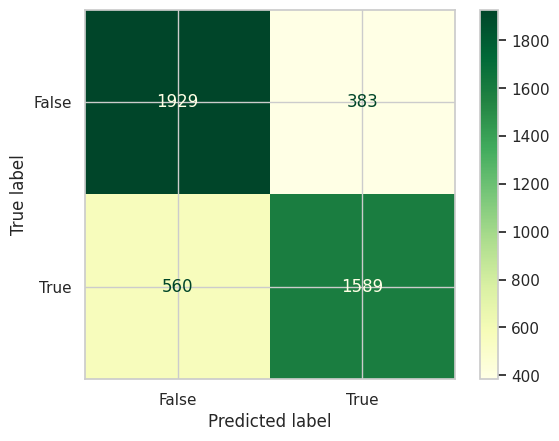

In [80]:
#confusion metric

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
#print(confusion)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [81]:
TP = confusion[1,1] #TRUE-POSITIVES
TN = confusion[0,0] #TRUE-NEGATIVES
FP = confusion[0,1] #FALSE-POSITIVES
FN = confusion[1,0] #FALSE-NEGATIVES

In [82]:
print("Accuracy =", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall =", metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Precision =", metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity = ", TP/(TP+FN))
print("Specificity = ", TN/(TN+FP))

Accuracy = 0.7886124187401928
Recall = 0.739413680781759
Precision = 0.8057809330628803
Sensitivity =  0.739413680781759
Specificity =  0.8343425605536332


In [83]:
#ROC CURVE - FOR OPTIMAL CUTOFF
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [85]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

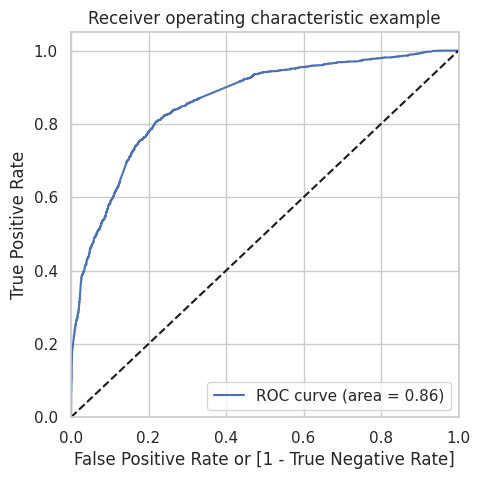

In [86]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [87]:
#CREATING COLUMNS WITH DIFFERENT PROBABILITY CUT-OFFS

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.527012     0.994416     0.092561
0.2          0.2  0.698274     0.944160     0.469723
0.3          0.3  0.767541     0.865984     0.676038
0.4          0.4  0.791975     0.810610     0.774654
0.5          0.5  0.788612     0.739414     0.834343
0.6          0.6  0.757229     0.624011     0.881055
0.7          0.7  0.735037     0.543509     0.913062
0.8          0.8  0.711500     0.453234     0.951557
0.9          0.9  0.644026     0.279665     0.982699


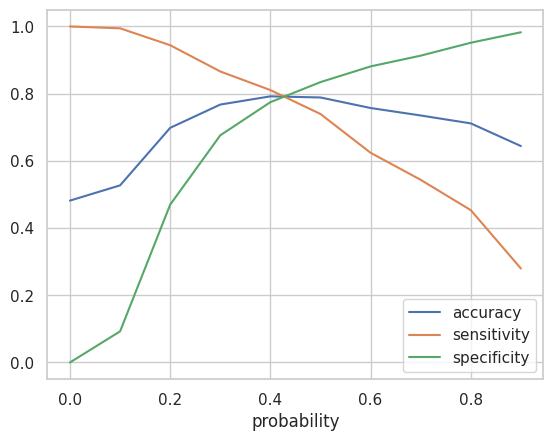

In [89]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [90]:
#choosing 0.42 as optimal cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


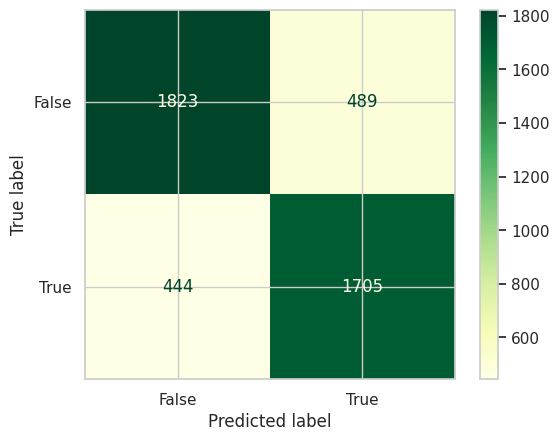

In [91]:
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [92]:
TP2 = confusion_matrix2[1,1] #TRUE-POSITIVES
TN2 = confusion_matrix2[0,0] #TRUE-NEGATIVES
FP2 = confusion_matrix2[0,1] #FALSE-POSITIVES
FN2 = confusion_matrix2[1,0] #FALSE-NEGATIVES

In [93]:
print("Accuracy =", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall =", metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Precision =", metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity = ", TP2/(TP2+FN2))
print("Specificity = ", TN2/(TN2+FP2))

Accuracy = 0.7886124187401928
Recall = 0.739413680781759
Precision = 0.8057809330628803
Sensitivity =  0.793392275476966
Specificity =  0.7884948096885813


In [94]:
#MAKING PREDICTIONS ON TEST SET


In [95]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
# Select the columns in X_train for X_test as well

X_test = X_test[col_to_keep]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [97]:
X_test_sm = sm.add_constant(X_test[col_to_keep])

In [98]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [99]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [100]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res5.predict(sm.add_constant(X_test))

In [101]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [102]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head

y_pred_df.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [104]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [105]:
# Remove index for both dataframes to append them side by side

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [107]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [108]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [109]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [110]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [111]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


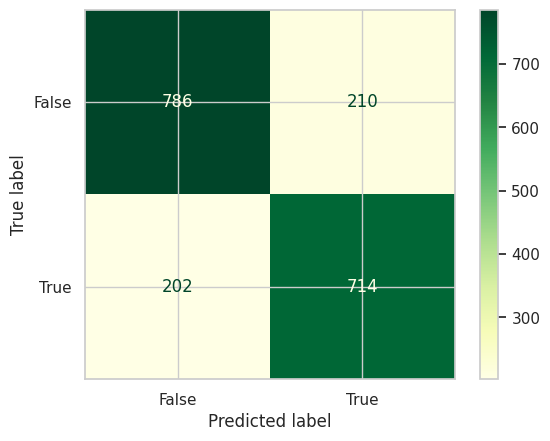

In [112]:
confusion_matrix3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [113]:
TP3 = confusion_matrix3[1,1] # true positive
TN3 = confusion_matrix3[0,0] # true negatives
FP3 = confusion_matrix3[0,1] # false positives
FN3 = confusion_matrix3[1,0] # false negatives

In [114]:
print("Accuracy =", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))
# Precision = TP / (TP + FP)
print("Precision = ",confusion_matrix3[1,1]/(confusion_matrix3[0,1]+confusion_matrix3[1,1]))
# Recall = TP / (TP + FN)
print("Recall = ", confusion_matrix3[1,1]/(confusion_matrix3[1,0]+confusion_matrix3[1,1]))
print("Sensitivity = ", TP3/(TP3+FN3))
print("Specificity = ", TN3/(TN3+FP3))

Accuracy = 0.7845188284518828
Precision =  0.7727272727272727
Recall =  0.7794759825327511
Sensitivity =  0.7794759825327511
Specificity =  0.7891566265060241


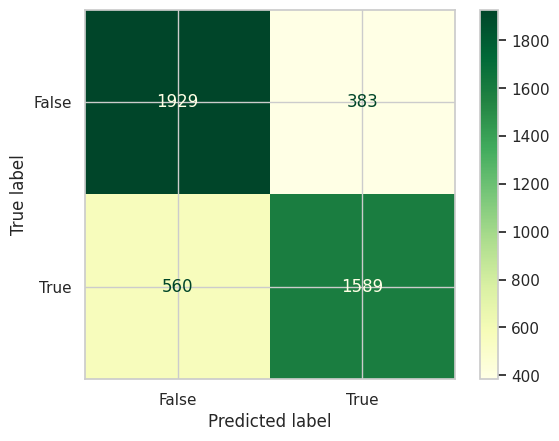

In [115]:
confusion_matrix4= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [116]:
print("Accuracy =", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))
# Precision = TP / (TP + FP)
print("Precision = ",confusion_matrix4[1,1]/(confusion_matrix4[0,1]+confusion_matrix4[1,1]))
# Recall = TP / (TP + FN)
print("Recall = ", confusion_matrix4[1,1]/(confusion_matrix4[1,0]+confusion_matrix4[1,1]))
print("Sensitivity = ", TP/(TP+FN))
print("Specificity = ", TN/(TN+FP))

Accuracy = 0.7845188284518828
Precision =  0.8057809330628803
Recall =  0.739413680781759
Sensitivity =  0.739413680781759
Specificity =  0.8343425605536332


In [117]:
#PRECISION AND RECALL TRADE-OFF
from sklearn.metrics import precision_recall_curve


In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

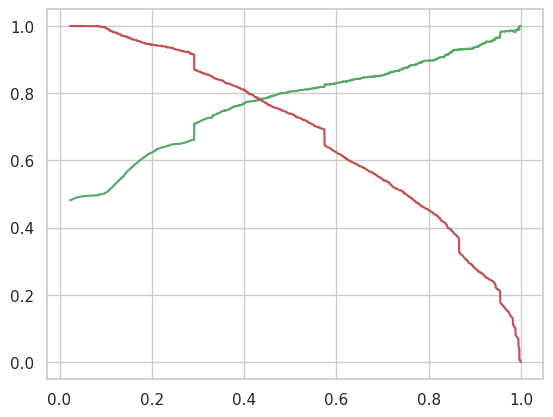

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


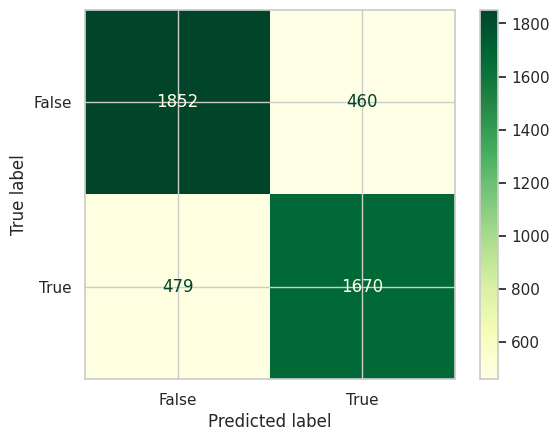

In [121]:
# Let's create the confusion matrix once again

confusion_matrix5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [122]:
# Let's evaluate the other metrics as well

TP5 = confusion_matrix5[1,1] # true positive
TN5 = confusion_matrix5[0,0] # true negatives
FP5 = confusion_matrix5[0,1] # false positives
FN5 = confusion_matrix5[1,0] # false negatives

In [123]:
print("Accuracy =", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))
# Precision = TP / (TP + FP)
print("Precision = ",TP5/(TP5+FP5))
# Recall = TP / (TP + FN)
print("Recall = ", TP5/(TP5+FN5))
print("Sensitivity = ", TP5/(TP5+FN5))
print("Specificity = ", TN5/(TN5+FP5))

Accuracy = 0.7845188284518828
Precision =  0.784037558685446
Recall =  0.7771056305258259
Sensitivity =  0.7771056305258259
Specificity =  0.801038062283737


In [124]:
#predictions on test data set


In [125]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res5.predict(sm.add_constant(X_test))

In [126]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [127]:
# Converting y_pred to a dataframe

y_pred_df= pd.DataFrame(y_test_pred)

In [128]:
# Let's see the head

y_pred_df.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [129]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [130]:
# Remove index for both dataframes to append them side by side

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [132]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [133]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [134]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [135]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [136]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


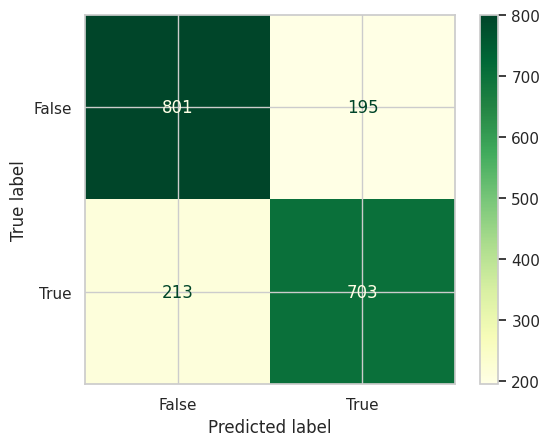

In [137]:
confusion_matrix6 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix6, \
                                            display_labels = [False, True])
cm_display.plot(cmap = 'YlGn')
plt.show()

In [138]:
TP6 = confusion_matrix6[1,1] # true positive
TN6 = confusion_matrix6[0,0] # true negatives
FP6 = confusion_matrix6[0,1] # false positives
FN6 = confusion_matrix6[1,0] # false negatives

In [139]:
print("Accuracy =", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))
# Precision = TP / (TP + FP)
print("Precision = ",TP6/(TP6+FP6))
# Recall = TP / (TP + FN)
print("Recall = ", TP6/(TP6+FN6))
print("Sensitivity = ", TP6/(TP6+FN6))
print("Specificity = ", TN6/(TN6+FP6))

Accuracy = 0.7866108786610879
Precision =  0.7828507795100222
Recall =  0.767467248908297
Sensitivity =  0.767467248908297
Specificity =  0.8042168674698795


*FINAL TRAIN DATASET OUTPUT *
Accuracy = 0.7845188284518828
Precision = 0.784037558685446
Recall = 0.7771056305258259
Sensitivity = 0.7771056305258259
Specificity = 0.801038062283737


*FINAL TEST DATASET OUTPUT *
Accuracy = 0.7866108786610879
Precision = 0.7828507795100222
Recall = 0.767467248908297
Sensitivity = 0.767467248908297
Specificity = 0.8042168674698795

The Model seems to predict the Conversion Rate of 76%.

---


